## Introduction

As seen in my first experiment, this notebook aims to run the same analyzes for a more polarized basis, that is, using **only positive or negative** feelings. 

For this, all my neutral tweets were transformed in positive tweets. Because neutral sentiments were generally about disclosing information about the company, considering them as positive is not so far from reality.

## Exploratory Data Analysis

In [9]:
import pandas as pd
import numpy as np
import re #for regular expressions
import nltk
import string
import warnings
import numpy as np

In [10]:
url = 'https://raw.githubusercontent.com/nathaliasbm/ML-Project/main/data/exp2.csv'
dataset = pd.read_csv(url, encoding='unicode_escape')
dataset.head()

,date,user_id,text,sentiment,replies,retweets,likes
0,2022-09-29 22:32:31+00:00,1.575615e+18,Celebrities Have HUGE MELTDOWN After WOKE Litt...,negative,0,0,1
1,2022-09-29 16:30:41+00:00,1.575523e+18,"Hey @Disney, is it too late to add a scene to ...",positive,0,0,3
2,2022-09-29 13:39:33+00:00,1.575480e+18,@rachelzegler Who is doing the casting work at...,negative,0,0,0
3,2022-09-29 13:11:28+00:00,1.575473e+18,My gf keeps bullying me because I thought Ursu...,positive,4,0,1
4,2022-09-29 10:53:55+00:00,1.575439e+18,Um @Disney why not make a movie about Gabriell...,positive,0,0,0


In [11]:
dataset.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
date,7558,7540,2019-08-09 15:20:00+00:00,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_id,7558.0,NaN,NaN,NaN,1266442397528765696.0,165853084907976000.0,1079928692829200000.0,1146907807318499968.0,1161430199046550016.0,1397483051395999744.0,1575614527936199936.0
text,7558,7546,@DisneyStudios @Disney tides by @JackAndJack s...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sentiment,7558,2,positive,5610,NaN,NaN,NaN,NaN,NaN,NaN,NaN
replies,7558.0,NaN,NaN,NaN,1.587854,51.466213,0.0,0.0,0.0,0.0,4317.0
retweets,7558.0,NaN,NaN,NaN,5.282218,117.079773,0.0,0.0,0.0,0.0,8231.0
likes,7558.0,NaN,NaN,NaN,29.625033,505.310577,0.0,0.0,0.0,2.0,28725.0


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7558 entries, 0 to 7557
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       7558 non-null   object 
 1   user_id    7558 non-null   float64
 2   text       7558 non-null   object 
 3   sentiment  7558 non-null   object 
 4   replies    7558 non-null   int64  
 5   retweets   7558 non-null   int64  
 6   likes      7558 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 413.5+ KB


In [13]:
print('The data has', dataset.shape[0],'rows and', dataset.shape[1], 'columns')

The data has 7558 rows and 7 columns


In [14]:
dataset.sentiment.value_counts()

positive    5610
negative    1948
Name: sentiment, dtype: int64

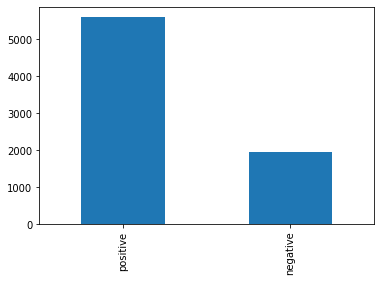

In [15]:
%matplotlib inline
dataset.sentiment.value_counts().plot(kind='bar')

As expected, the dataset has more positive sentiments (5610) than negative sentiments (1948).

Similar to my first notebook, I will now plot whether engagement measures (i.e., likes, retweets and replies) vary across sentiments.

### Engagement Evaluation

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import cross_val_predict

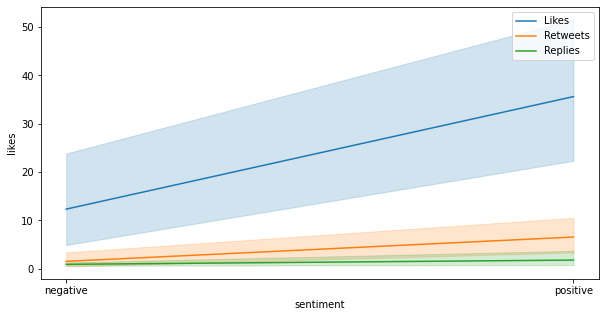

In [17]:
plt.figure(figsize=(10,5))
sns.lineplot(x='sentiment',y='likes',data=dataset,label='Likes')
sns.lineplot(x='sentiment',y='retweets',data=dataset,label='Retweets')
sns.lineplot(x='sentiment',y='replies',data=dataset, label='Replies')
plt.show()

As expected, the levels of engagement were higher for positive sentiments.

Next, I will explore how users' engagement and sentiments differ during different months and years.

In [18]:
import cufflinks as cf
cf.go_offline()

In [21]:
dataset.date = pd.to_datetime(dataset.date)
dataset.date.dt.to_period('M')
dataset['date_month'] = dataset.date.dt.to_period('M').astype(str)

/usr/local/lib/python3.8/dist-packages/pandas/core/arrays/datetimes.py:1143: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



In [22]:
sentiment_month = dataset.groupby(by = 'date_month').sentiment.count()
sentiment_month.index
sentiment_month.values

array([  99,  153,  120,  125,  125,  353, 2647,  293,  111,  134,  307,
         95,   81,   52,   52,  109,   96,   58,   81,   62,   67,   38,
         66,   75,   58,   57,   55,   54,   65,   73,   63,   57,   47,
         45,   51,   26,   31,   51,   48,   72,   57,   90,   40,   49,
       1070])

In [23]:
import plotly
import plotly.graph_objs as go
import plotly.offline as py

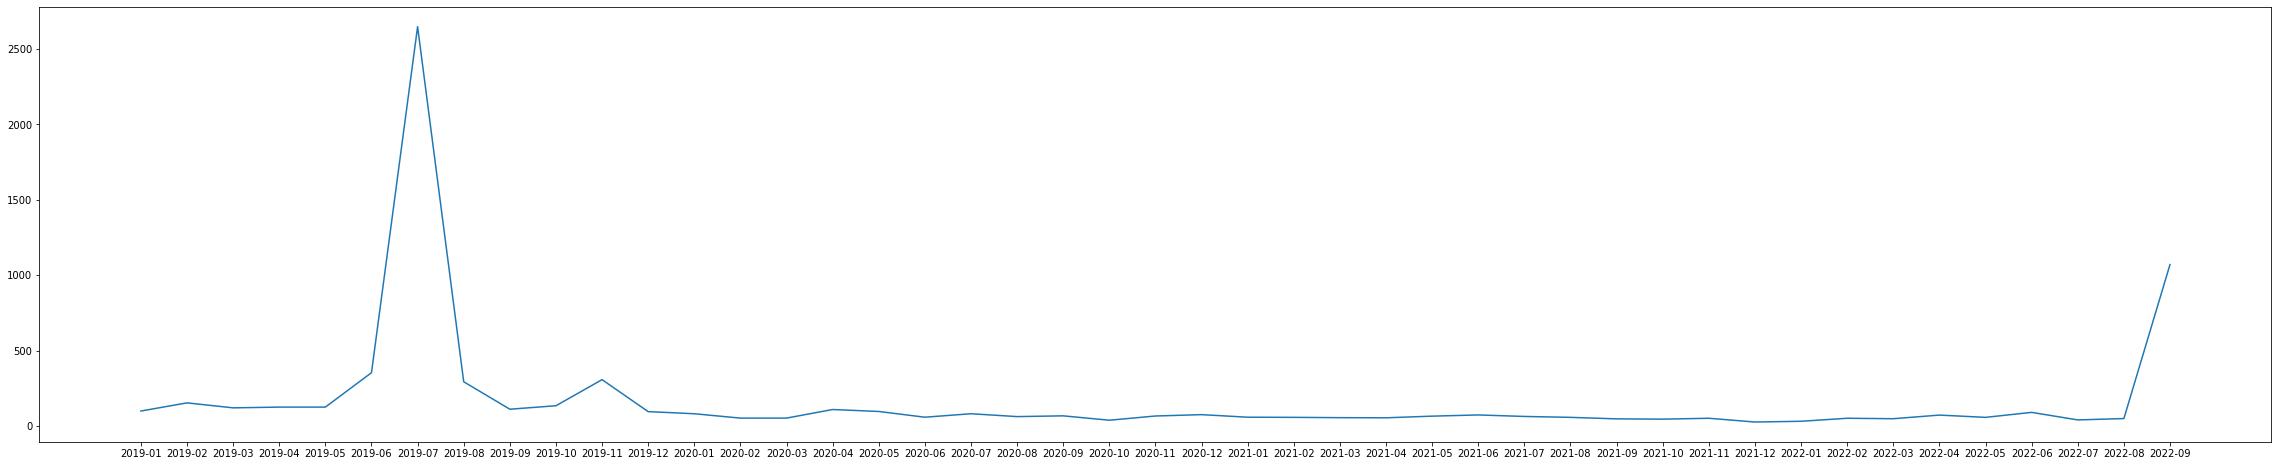

In [24]:
plt.figure(figsize=(40,8))
plt.plot(sentiment_month.index,sentiment_month.values)
plt.show()

Also similar to the first experiment, the month regarding most sentiments from users (that is, most interaction on Twitter) was in July 2019, followed by September 2022.

Now I will compare engagement measures per months and years.

In [25]:
# Per month
replies_month = dataset.groupby(by = 'date_month').replies.sum()
retweets_month = dataset.groupby(by = 'date_month').retweets.sum()
likes_month = dataset.groupby(by = 'date_month').likes.sum()

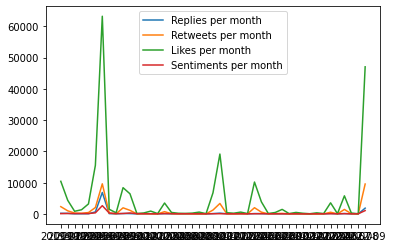

<Figure size 2880x576 with 0 Axes>

In [26]:
fig, varx = plt.subplots()
varx.plot(likes_month.index,replies_month,label='Replies per month')
varx.plot(likes_month.index,retweets_month,label='Retweets per month')
varx.plot(likes_month.index,likes_month,label='Likes per month')
varx.plot(likes_month.index,sentiment_month,label='Sentiments per month')

plt.figure(figsize=(40,8))
varx.legend()
plt.show()

In [28]:
# Per year
dataset.date.dt.to_period('Y')
dataset['date_year'] = dataset.date.dt.to_period('Y').astype(str)

/usr/local/lib/python3.8/dist-packages/pandas/core/arrays/datetimes.py:1143: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



In [29]:
replies_year = dataset.groupby(by = 'date_year').replies.sum()
likes_year = dataset.groupby(by = 'date_year').likes.sum()
retweets_year = dataset.groupby(by = 'date_year').retweets.sum()

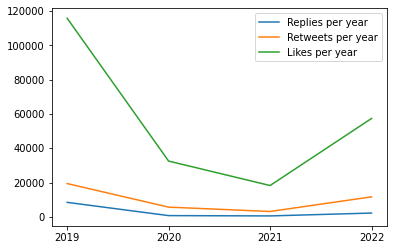

<Figure size 1440x720 with 0 Axes>

In [30]:
fig, varx = plt.subplots()
varx.plot(likes_year.index,replies_year,label='Replies per year')
varx.plot(likes_year.index,retweets_year,label='Retweets per year')
varx.plot(likes_year.index,likes_year,label='Likes per year')


plt.figure(figsize=(20,10))
varx.legend()
plt.show()

Again, replies, retweets, and likes were higher in 2019 (when the casting for Little Mermaid was released) than in other years - as expected.

In [31]:
sentiment_year = dataset.groupby(by = 'date_year').sentiment.value_counts()

In [32]:
sentiment_year.value_counts

<bound method IndexOpsMixin.value_counts of date_year  sentiment
2019       positive     3368
           negative     1194
2020       positive      638
           negative      199
2021       positive      546
           negative      105
2022       positive     1058
           negative      450
Name: sentiment, dtype: int64>

Once again, the years with the most negative feelings were 2019, 2022, 2020, and 2021, respectively.

## Supervised Learning for Sentiment Analysis

### Preprocessing

The data will be preprocessed equally as my first code.

#### Dropping unused columns

In [33]:
# Dropping all columns except for sentiment and text (engagement measures will not be used anymores)
dataset.drop(['date','user_id','replies', 'retweets', 'likes','date_month','date_year'],inplace=True, axis=1)

In [34]:
dataset.head()

,text,sentiment
0,Celebrities Have HUGE MELTDOWN After WOKE Litt...,negative
1,"Hey @Disney, is it too late to add a scene to ...",positive
2,@rachelzegler Who is doing the casting work at...,negative
3,My gf keeps bullying me because I thought Ursu...,positive
4,Um @Disney why not make a movie about Gabriell...,positive


#### Transforming categorical variable to numerical

In [35]:
# Transforming "sentiment" in a numerical variable
from nltk.classify.scikitlearn import LabelEncoder
from sklearn import preprocessing
for variaveis in ['sentiment']:
  dataset[variaveis] = LabelEncoder().fit_transform(dataset[variaveis])

dataset.head()

,text,sentiment
0,Celebrities Have HUGE MELTDOWN After WOKE Litt...,0
1,"Hey @Disney, is it too late to add a scene to ...",1
2,@rachelzegler Who is doing the casting work at...,0
3,My gf keeps bullying me because I thought Ursu...,1
4,Um @Disney why not make a movie about Gabriell...,1


In [37]:
# The Label Encoder function transformed negative sentiments to 0, and positive sentiments to 1.
dataset.sentiment.value_counts()

1    5610
0    1948
Name: sentiment, dtype: int64

#### HTML Removal

In [38]:
from bs4 import BeautifulSoup
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")                    
    return soup.get_text()


dataset['text'] = dataset['text'].apply(lambda x: strip_html(x))

In [39]:
# I will also remove URLs (if any)
def remove_url(text): 
    text = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','',text)
    return text
dataset['text'] = dataset['text'].apply(lambda x: remove_url(x))
dataset.head()

,text,sentiment
0,Celebrities Have HUGE MELTDOWN After WOKE Litt...,0
1,"Hey @Disney, is it too late to add a scene to ...",1
2,@rachelzegler Who is doing the casting work at...,0
3,My gf keeps bullying me because I thought Ursu...,1
4,Um @Disney why not make a movie about Gabriell...,1


#### Removal of numbers and mentions

In [40]:
#remove the numericals present in the text
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

dataset['text'] = dataset['text'].apply(lambda x: remove_numbers(x))

In [41]:
# remove the mentions in the tweets
def remove_mention(text):
    text = re.sub(r'@\w+','',text)
    return text
dataset['text'] = dataset['text'].apply(lambda x: remove_mention(x))
dataset.head()

,text,sentiment
0,Celebrities Have HUGE MELTDOWN After WOKE Litt...,0
1,"Hey , is it too late to add a scene to the new...",1
2,Who is doing the casting work at ? She/He nee...,0
3,My gf keeps bullying me because I thought Ursu...,1
4,Um why not make a movie about Gabriella inste...,1


#### Tokenization

In [42]:
# First I will remove contractions
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [43]:
def cont_to_exp(x):
    for key in contractions:
        value=contractions[key]
        x=x.replace(key,value)
    return x


dataset['text'] = dataset['text'].apply(lambda x: cont_to_exp(x))
dataset.head()

,text,sentiment
0,Celebrities Have HUGE MELTDOWN After WOKE Litt...,0
1,"Hey , is it too late to add a scene to the new...",1
2,Who is doing the casting work at ? She/He nee...,0
3,My gf keeps bullying me because I thought Ursu...,1
4,Um why not make a movie about Gabriella inste...,1


In [44]:
#for tokenize

!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import unicodedata
from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [45]:
dataset['text'] = dataset.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
dataset.head()

,text,sentiment
0,"[Celebrities, Have, HUGE, MELTDOWN, After, WOK...",0
1,"[Hey, ,, is, it, too, late, to, add, a, scene,...",1
2,"[Who, is, doing, the, casting, work, at, ?, Sh...",0
3,"[My, gf, keeps, bullying, me, because, I, thou...",1
4,"[Um, why, not, make, a, movie, about, Gabriell...",1


In [46]:
#remove the non-ASCII characters
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words
dataset['text']=dataset['text'].apply(lambda x: remove_non_ascii(x))
dataset.head()

,text,sentiment
0,"[Celebrities, Have, HUGE, MELTDOWN, After, WOK...",0
1,"[Hey, ,, is, it, too, late, to, add, a, scene,...",1
2,"[Who, is, doing, the, casting, work, at, ?, Sh...",0
3,"[My, gf, keeps, bullying, me, because, I, thou...",1
4,"[Um, why, not, make, a, movie, about, Gabriell...",1


#### Lower case convertion

In [47]:
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words
dataset['text']=dataset['text'].apply(lambda x: to_lowercase(x))
dataset.head()

,text,sentiment
0,"[celebrities, have, huge, meltdown, after, wok...",0
1,"[hey, ,, is, it, too, late, to, add, a, scene,...",1
2,"[who, is, doing, the, casting, work, at, ?, sh...",0
3,"[my, gf, keeps, bullying, me, because, i, thou...",1
4,"[um, why, not, make, a, movie, about, gabriell...",1


#### Hashtags Removal

In [48]:
def remove_hash(words):
    """Remove hashtags from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'#\w+','',word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

dataset['text']=dataset['text'].apply(lambda x: remove_hash(x))
dataset.head()

,text,sentiment
0,"[celebrities, have, huge, meltdown, after, wok...",0
1,"[hey, ,, is, it, too, late, to, add, a, scene,...",1
2,"[who, is, doing, the, casting, work, at, ?, sh...",0
3,"[my, gf, keeps, bullying, me, because, i, thou...",1
4,"[um, why, not, make, a, movie, about, gabriell...",1


#### Punctuation Removal

In [49]:
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

dataset['text']=dataset['text'].apply(lambda x: remove_punctuation(x))
dataset.head()

,text,sentiment
0,"[celebrities, have, huge, meltdown, after, wok...",0
1,"[hey, is, it, too, late, to, add, a, scene, to...",1
2,"[who, is, doing, the, casting, work, at, shehe...",0
3,"[my, gf, keeps, bullying, me, because, i, thou...",1
4,"[um, why, not, make, a, movie, about, gabriell...",1


#### Stopwords Removal

In [50]:
stopwords = stopwords.words('english')
stopwords = list(set(stopwords)) 


# Remove the stop words
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

dataset['text']=dataset['text'].apply(lambda x: remove_stopwords(x))
dataset.head()

,text,sentiment
0,"[celebrities, huge, meltdown, woke, little, me...",0
1,"[hey, late, add, scene, new, little, mermaid, ...",1
2,"[casting, work, shehe, needs, fired, doesnt, l...",0
3,"[gf, keeps, bullying, thought, ursula, little,...",1
4,"[um, make, movie, gabriella, instead, ariel, o...",1


#### Lemmatize

In [51]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [52]:
lemmatizer = WordNetLemmatizer()
# lemmatize the words
def lemmatize_list(words):
    new_words = []
    for word in words:
        new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

dataset['text']=dataset['text'].apply(lambda x: lemmatize_list(x))
dataset.head()

,text,sentiment
0,"[celebrities, huge, meltdown, wake, little, me...",0
1,"[hey, late, add, scene, new, little, mermaid, ...",1
2,"[cast, work, shehe, need, fire, doesnt, look, ...",0
3,"[gf, keep, bully, think, ursula, little, merma...",1
4,"[um, make, movie, gabriella, instead, ariel, o...",1


Now I will normalize the text and take one last look at the first 5 rows.


In [53]:
def normalize(words):
    return ' '.join(words) #take the words out of the list and use space as a delimiter
dataset['text']=dataset['text'].apply(lambda x: normalize(x))
dataset.head()

,text,sentiment
0,celebrities huge meltdown wake little mermaid ...,0
1,hey late add scene new little mermaid ariel pl...,1
2,cast work shehe need fire doesnt look like lit...,0
3,gf keep bully think ursula little mermaid hot ...,1
4,um make movie gabriella instead ariel official...,1


### Bag of Words

In BoW, we construct a dictionary that contains the set of all unique words from our text review dataset. The frequency of the word is counted here. If there are d unique words in our dictionary then for every review the vector will be of length d and count of word from reviews is stored at its particular location in vector. The vector will be highly sparse in such cases.

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier       # Import Random forest Classifier
from sklearn.metrics import classification_report         # Import Classification report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

In [55]:
# Vectorization (Convert text data to numbers).


Count_vec = CountVectorizer(max_features=1000)        # Keep only 1000 features as number of features will increase the processing time.
data_features = Count_vec.fit_transform(dataset['text'])

data_features = data_features.toarray()                # Convert the data features to array.

In [56]:
data_features.shape

(7558, 1000)

### Splitting into training and testing set

In [57]:
X = data_features

y = dataset['sentiment']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
print("Size of x_train:", (X_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (X_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (6046, 1000)
Size of y_train: (6046,)
Size of x_test: (1512, 1000)
Size of y_test: (1512,)


### Addressing the imbalance issue

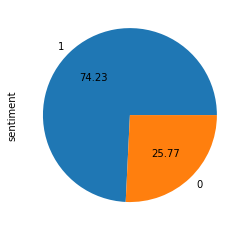

In [60]:
%matplotlib inline
dataset.sentiment.value_counts().plot.pie(autopct='%.2f')

In [61]:
!pip install imbalanced-learn

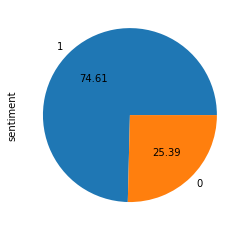

In [62]:
# Pie chart of the training set
y_train.value_counts().plot.pie(autopct='%.2f')

In [63]:
y_train.value_counts()

1    4511
0    1535
Name: sentiment, dtype: int64

#### Class Balancing: Random Oversampling

In [64]:
from imblearn.over_sampling import RandomOverSampler

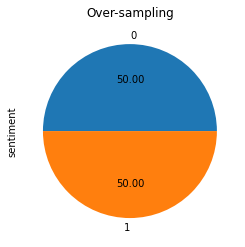

In [65]:
ros = RandomOverSampler(sampling_strategy="not majority") # String
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

ax = y_train_ros.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [66]:
y_train_ros.value_counts()

0    4511
1    4511
Name: sentiment, dtype: int64

#### Class Balancing: Random Undersampling

In [67]:
from imblearn.under_sampling import RandomUnderSampler

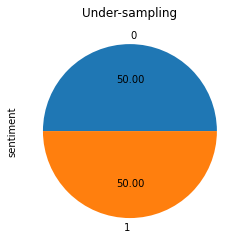

In [68]:
rus = RandomUnderSampler(sampling_strategy="not minority") # String
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

ax = y_train_rus.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [69]:
# Class distribution
y_train_rus.value_counts()

0    1535
1    1535
Name: sentiment, dtype: int64

### Classification without balanced class

#### Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

In [71]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [72]:
logreg_pred = logreg.predict(X_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print(logreg_acc)

0.7896825396825397


In [73]:
print(confusion_matrix(y_test,logreg_pred))
print("\n")
print(classification_report(y_test,logreg_pred))

[[ 176  237]
 [  81 1018]]


              precision    recall  f1-score   support

           0       0.68      0.43      0.53       413
           1       0.81      0.93      0.86      1099

    accuracy                           0.79      1512
   macro avg       0.75      0.68      0.70      1512
weighted avg       0.78      0.79      0.77      1512



#### Naive Bayes

In [74]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

In [75]:
nbm,nbg,nbb = MultinomialNB(alpha=1.0,fit_prior=True), GaussianNB(), BernoulliNB(alpha=1.0,fit_prior=True)
nbm.fit(X_train, y_train)
nbg.fit(X_train, y_train)
nbb.fit(X_train, y_train)

BernoulliNB()

In [76]:
ypm = nbm.predict(X_test)
ypg = nbg.predict(X_test)
ypb = nbb.predict(X_test)

In [77]:
print("Multinomial:", accuracy_score(y_test, ypm))
print("Gaussian:", accuracy_score(y_test, ypg))
print("Bernoulli:", accuracy_score(y_test, ypb))

Multinomial: 0.7632275132275133
Gaussian: 0.4365079365079365
Bernoulli: 0.7552910052910053


#### K-Neighbors Classifier

In [78]:
from sklearn.neighbors import KNeighborsClassifier
import time

In [79]:
clf_knn = KNeighborsClassifier(n_neighbors = 5)
ini_knn = time.time()
clf_knn.fit(X_train, y_train)
fim_knn = time.time()
pred_knn = clf_knn.predict(X_test)
pre_knn = time.time()
treino_knn = fim_knn - ini_knn
time_prev_knn = pre_knn - fim_knn

In [80]:
print("KNN:", accuracy_score(y_test, pred_knn))

print(confusion_matrix(y_test, pred_knn))

KNN: 0.7328042328042328
[[  37  376]
 [  28 1071]]


In [81]:
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.57      0.09      0.15       413
           1       0.74      0.97      0.84      1099

    accuracy                           0.73      1512
   macro avg       0.65      0.53      0.50      1512
weighted avg       0.69      0.73      0.65      1512



#### Support Vector Machine (SVM)

In [82]:
from sklearn.svm import SVC
clf_svm = SVC()
ini_svm = time.time()
clf_svm.fit(X_train, y_train)
fim_svm = time.time()
pred_svm = clf_svm.predict(X_test)
pre_svm = time.time()
treino_svm = fim_svm - ini_svm
time_prev_svm = pre_svm - fim_svm

In [83]:
print("SVM:", accuracy_score(y_test, pred_svm))

print(confusion_matrix(y_test, pred_knn))

SVM: 0.7784391534391535
[[  37  376]
 [  28 1071]]


In [84]:
print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

           0       0.78      0.26      0.39       413
           1       0.78      0.97      0.86      1099

    accuracy                           0.78      1512
   macro avg       0.78      0.62      0.63      1512
weighted avg       0.78      0.78      0.74      1512



#### K-fold cross-validation

Using k-fold cross-validation to determine an optimal number of base learners in a random forest classifier model that will recieve the count vectorizer matrix as input.

In [85]:
# Finding optimal number of base learners
base_ln = np.arange(100,400,100).tolist()
base_ln

[100, 200, 300]

In [86]:
# K-Fold Cross-validation
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

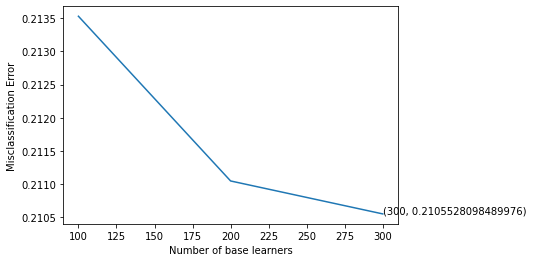

In [87]:
# Plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

Apparently, for CountVectorizer, the error was at a minimum when there were 300 base learners in the random forest.

#### Random Forest

In [88]:
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [89]:
clf.score(X_test, y_test)
count_vectorizer_predicted = clf.predict(X_test)
print(classification_report(y_test ,count_vectorizer_predicted , target_names = ['negative' ,'positive']))
print("Accuracy of the model is : ",accuracy_score(y_test,count_vectorizer_predicted))

              precision    recall  f1-score   support

    negative       0.65      0.41      0.50       413
    positive       0.81      0.92      0.86      1099

    accuracy                           0.78      1512
   macro avg       0.73      0.66      0.68      1512
weighted avg       0.76      0.78      0.76      1512

Accuracy of the model is :  0.7791005291005291


### Classification with oversampled balanced class

#### Logistic Regression

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

In [91]:
logreg = LogisticRegression()
logreg.fit(X_train_ros, y_train_ros)

LogisticRegression()

In [92]:
logreg_pred = logreg.predict(X_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print(logreg_acc)

0.7420634920634921


In [93]:
print(confusion_matrix(y_test,logreg_pred))
print("\n")
print(classification_report(y_test,logreg_pred))

[[253 160]
 [230 869]]


              precision    recall  f1-score   support

           0       0.52      0.61      0.56       413
           1       0.84      0.79      0.82      1099

    accuracy                           0.74      1512
   macro avg       0.68      0.70      0.69      1512
weighted avg       0.76      0.74      0.75      1512



#### Naive Bayes

In [94]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

In [95]:
nbm,nbg,nbb = MultinomialNB(alpha=1.0,fit_prior=True), GaussianNB(), BernoulliNB(alpha=1.0,fit_prior=True)
nbm.fit(X_train_ros, y_train_ros)
nbg.fit(X_train_ros, y_train_ros)
nbb.fit(X_train_ros, y_train_ros)

BernoulliNB()

In [96]:
ypm = nbm.predict(X_test)
ypg = nbg.predict(X_test)
ypb = nbb.predict(X_test)

In [97]:
print("Multinomial:", accuracy_score(y_test, ypm))
print("Gaussian:", accuracy_score(y_test, ypg))
print("Bernoulli:", accuracy_score(y_test, ypb))

Multinomial: 0.7361111111111112
Gaussian: 0.44113756613756616
Bernoulli: 0.7308201058201058


#### K-Neighbors Classifier

In [98]:
from sklearn.neighbors import KNeighborsClassifier
import time

In [99]:
clf_knn = KNeighborsClassifier(n_neighbors = 5)
ini_knn = time.time()
clf_knn.fit(X_train_ros, y_train_ros)
fim_knn = time.time()
pred_knn = clf_knn.predict(X_test)
pre_knn = time.time()
treino_knn = fim_knn - ini_knn
time_prev_knn = pre_knn - fim_knn

In [100]:
print("KNN:", accuracy_score(y_test, pred_knn))

print(confusion_matrix(y_test, pred_knn))

KNN: 0.6574074074074074
[[134 279]
 [239 860]]


In [101]:
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.36      0.32      0.34       413
           1       0.76      0.78      0.77      1099

    accuracy                           0.66      1512
   macro avg       0.56      0.55      0.55      1512
weighted avg       0.65      0.66      0.65      1512



#### Support Vector Machine (SVM)

In [102]:
from sklearn.svm import SVC
clf_svm = SVC()
ini_svm = time.time()
clf_svm.fit(X_train_ros, y_train_ros)
fim_svm = time.time()
pred_svm = clf_svm.predict(X_test)
pre_svm = time.time()
treino_svm = fim_svm - ini_svm
time_prev_svm = pre_svm - fim_svm

In [103]:
print("SVM:", accuracy_score(y_test, pred_svm))

print(confusion_matrix(y_test, pred_knn))

SVM: 0.7691798941798942
[[134 279]
 [239 860]]


In [104]:
print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

           0       0.59      0.50      0.54       413
           1       0.82      0.87      0.85      1099

    accuracy                           0.77      1512
   macro avg       0.71      0.68      0.69      1512
weighted avg       0.76      0.77      0.76      1512



#### K-fold cross-validation

Using k-fold cross-validation to determine an optimal number of base learners in a random forest classifier model that will recieve the count vectorizer matrix as input.

In [105]:
# Finding optimal number of base learners
base_ln = np.arange(100,400,100).tolist()
base_ln

[100, 200, 300]

In [106]:
# K-Fold Cross-validation
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train_ros, y_train_ros, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

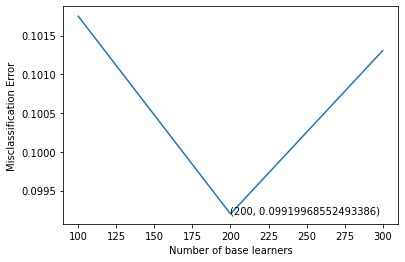

In [107]:
# Plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

Apparently, for CountVectorizer, the error was at a minimum when there were 300 base learners in the random forest.

#### Random Forest

In [108]:
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train_ros, y_train_ros)

RandomForestClassifier(n_estimators=200)

In [109]:
clf.score(X_test, y_test)
count_vectorizer_predicted = clf.predict(X_test)
print(classification_report(y_test ,count_vectorizer_predicted , target_names = ['negative' ,'positive']))
print("Accuracy of the model is : ",accuracy_score(y_test,count_vectorizer_predicted))

              precision    recall  f1-score   support

    negative       0.54      0.49      0.51       413
    positive       0.81      0.84      0.83      1099

    accuracy                           0.75      1512
   macro avg       0.68      0.67      0.67      1512
weighted avg       0.74      0.75      0.74      1512

Accuracy of the model is :  0.746031746031746


### Classification with undersampled balanced class

#### Logistic Regression

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

In [111]:
logreg = LogisticRegression()
logreg.fit(X_train_rus, y_train_rus)

LogisticRegression()

In [112]:
logreg_pred = logreg.predict(X_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print(logreg_acc)

0.7202380952380952


In [113]:
print(confusion_matrix(y_test,logreg_pred))
print("\n")
print(classification_report(y_test,logreg_pred))

[[277 136]
 [287 812]]


              precision    recall  f1-score   support

           0       0.49      0.67      0.57       413
           1       0.86      0.74      0.79      1099

    accuracy                           0.72      1512
   macro avg       0.67      0.70      0.68      1512
weighted avg       0.76      0.72      0.73      1512



#### Naive Bayes

In [114]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

In [115]:
nbm,nbg,nbb = MultinomialNB(alpha=1.0,fit_prior=True), GaussianNB(), BernoulliNB(alpha=1.0,fit_prior=True)
nbm.fit(X_train_rus, y_train_rus)
nbg.fit(X_train_rus, y_train_rus)
nbb.fit(X_train_rus, y_train_rus)

BernoulliNB()

In [116]:
ypm = nbm.predict(X_test)
ypg = nbg.predict(X_test)
ypb = nbb.predict(X_test)

In [117]:
print("Multinomial:", accuracy_score(y_test, ypm))
print("Gaussian:", accuracy_score(y_test, ypg))
print("Bernoulli:", accuracy_score(y_test, ypb))

Multinomial: 0.7182539682539683
Gaussian: 0.4689153439153439
Bernoulli: 0.7288359788359788


#### K-Neighbors Classifier

In [118]:
from sklearn.neighbors import KNeighborsClassifier
import time

In [119]:
clf_knn = KNeighborsClassifier(n_neighbors = 5)
ini_knn = time.time()
clf_knn.fit(X_train_rus, y_train_rus)
fim_knn = time.time()
pred_knn = clf_knn.predict(X_test)
pre_knn = time.time()
treino_knn = fim_knn - ini_knn
time_prev_knn = pre_knn - fim_knn

In [120]:
print("KNN:", accuracy_score(y_test, pred_knn))

print(confusion_matrix(y_test, pred_knn))

KNN: 0.7136243386243386
[[106 307]
 [126 973]]


In [121]:
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.46      0.26      0.33       413
           1       0.76      0.89      0.82      1099

    accuracy                           0.71      1512
   macro avg       0.61      0.57      0.57      1512
weighted avg       0.68      0.71      0.68      1512



#### Support Vector Machine (SVM)

In [122]:
from sklearn.svm import SVC
clf_svm = SVC()
ini_svm = time.time()
clf_svm.fit(X_train_rus, y_train_rus)
fim_svm = time.time()
pred_svm = clf_svm.predict(X_test)
pre_svm = time.time()
treino_svm = fim_svm - ini_svm
time_prev_svm = pre_svm - fim_svm

In [123]:
print("SVM:", accuracy_score(y_test, pred_svm))

print(confusion_matrix(y_test, pred_knn))

SVM: 0.7103174603174603
[[106 307]
 [126 973]]


In [124]:
print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

           0       0.48      0.63      0.54       413
           1       0.84      0.74      0.79      1099

    accuracy                           0.71      1512
   macro avg       0.66      0.69      0.67      1512
weighted avg       0.74      0.71      0.72      1512



#### K-fold cross-validation

Using k-fold cross-validation to determine an optimal number of base learners in a random forest classifier model that will recieve the count vectorizer matrix as input.

In [125]:
# Finding optimal number of base learners
base_ln = np.arange(100,400,100).tolist()
base_ln

[100, 200, 300]

In [126]:
# K-Fold Cross-validation
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train_rus, y_train_rus, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

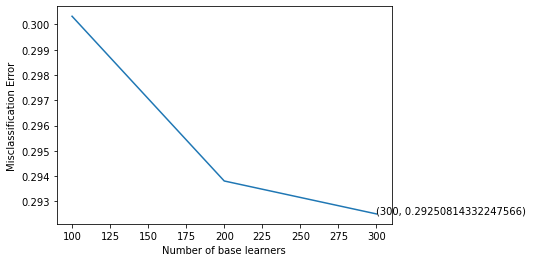

In [127]:
# Plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

Apparently, for CountVectorizer, the error was at a minimum when there were 300 base learners in the random forest.

#### Random Forest

In [128]:
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train_rus, y_train_rus)

RandomForestClassifier(n_estimators=300)

In [129]:
clf.score(X_test, y_test)
count_vectorizer_predicted = clf.predict(X_test)
print(classification_report(y_test ,count_vectorizer_predicted , target_names = ['negative' ,'positive']))
print("Accuracy of the model is : ",accuracy_score(y_test,count_vectorizer_predicted))

              precision    recall  f1-score   support

    negative       0.43      0.69      0.53       413
    positive       0.85      0.66      0.74      1099

    accuracy                           0.67      1512
   macro avg       0.64      0.68      0.64      1512
weighted avg       0.74      0.67      0.69      1512

Accuracy of the model is :  0.669973544973545


### Another approach for evaluation

#### Model Building with oversampled balanced class

In [130]:
# Training Random Forest Models
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train_ros, y_train_ros)

# Training Cross-validation Models
from sklearn.metrics import make_scorer, recall_score, matthews_corrcoef
from sklearn.model_selection import cross_validate

model_cv = RandomForestClassifier(random_state=42)
cv_scoring = {'MCC': make_scorer(matthews_corrcoef)}
cv = cross_validate(model_cv, X_train_ros, y_train_ros, cv=5, scoring=cv_scoring)

# Apply model to make prediction
from sklearn.metrics import matthews_corrcoef

y_train_pred = model.predict(X_train_ros)
y_test_pred = model.predict(X_test)
  
mcc_train = matthews_corrcoef(y_train_ros, y_train_pred)
mcc_test = matthews_corrcoef(y_test, y_test_pred)
mcc_cv = cv['test_MCC'].mean()

# Display model performance results
df_labels = pd.Series(['MCC_train', 'MCC_CV', 'MCC_test'], name = 'Performance_metric_names')
df_values = pd.Series([mcc_train, mcc_cv, mcc_test], name = 'Performance_metric_values')
df3 = pd.concat([df_labels, df_values], axis=1)
df3

,Performance_metric_names,Performance_metric_values
0,MCC_train,0.992023
1,MCC_CV,0.802567
2,MCC_test,0.343164


#### Model Building with undersampled balanced class

In [131]:
# Training Random Forest Models
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train_rus, y_train_rus)

# Training Cross-validation Models
from sklearn.metrics import make_scorer, recall_score, matthews_corrcoef
from sklearn.model_selection import cross_validate

model_cv = RandomForestClassifier(random_state=42)
cv_scoring = {'MCC': make_scorer(matthews_corrcoef)}
cv = cross_validate(model_cv, X_train_rus, y_train_rus, cv=5, scoring=cv_scoring)

# Apply model to make prediction
from sklearn.metrics import matthews_corrcoef

y_train_pred = model.predict(X_train_rus)
y_test_pred = model.predict(X_test)
  
mcc_train = matthews_corrcoef(y_train_rus, y_train_pred)
mcc_test = matthews_corrcoef(y_test, y_test_pred)
mcc_cv = cv['test_MCC'].mean()

# Display model performance results
df_labels = pd.Series(['MCC_train', 'MCC_CV', 'MCC_test'], name = 'Performance_metric_names')
df_values = pd.Series([mcc_train, mcc_cv, mcc_test], name = 'Performance_metric_values')
df2 = pd.concat([df_labels, df_values], axis=1)
df2

,Performance_metric_names,Performance_metric_values
0,MCC_train,0.992851
1,MCC_CV,0.409072
2,MCC_test,0.327510


#### Model Building without balanced class

In [132]:
# Training Random Forest Models
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Training Cross-validation Models
from sklearn.metrics import make_scorer, recall_score, matthews_corrcoef
from sklearn.model_selection import cross_validate

model_cv = RandomForestClassifier(random_state=42)
cv_scoring = {'MCC': make_scorer(matthews_corrcoef)}
cv = cross_validate(model_cv, X_train, y_train, cv=5, scoring=cv_scoring)

# Apply model to make prediction
from sklearn.metrics import matthews_corrcoef

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
  
mcc_train = matthews_corrcoef(y_train, y_train_pred)
mcc_test = matthews_corrcoef(y_test, y_test_pred)
mcc_cv = cv['test_MCC'].mean()

# Display model performance results
df_labels = pd.Series(['MCC_train', 'MCC_CV', 'MCC_test'], name = 'Performance_metric_names')
df_values = pd.Series([mcc_train, mcc_cv, mcc_test], name = 'Performance_metric_values')
df1 = pd.concat([df_labels, df_values], axis=1)
df1

,Performance_metric_names,Performance_metric_values
0,MCC_train,0.992574
1,MCC_CV,0.376133
2,MCC_test,0.384811


#### Model Building with class weight balancing

In [133]:
# Training Random Forest Models
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42, class_weight='balanced') # Class weight balancing
model.fit(X_train, y_train)

# Training Cross-validation Models
from sklearn.metrics import make_scorer, recall_score, matthews_corrcoef
from sklearn.model_selection import cross_validate

model_cv = RandomForestClassifier(random_state=42, class_weight='balanced') # Class weight balancing
cv_scoring = {'MCC': make_scorer(matthews_corrcoef)}
cv = cross_validate(model_cv, X_train, y_train, cv=5, scoring=cv_scoring)

# Apply model to make prediction
from sklearn.metrics import matthews_corrcoef

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
  
mcc_train = matthews_corrcoef(y_train, y_train_pred)
mcc_test = matthews_corrcoef(y_test, y_test_pred)
mcc_cv = cv['test_MCC'].mean()

# Display model performance results
df_labels = pd.Series(['MCC_train', 'MCC_CV', 'MCC_test'], name = 'Performance_metric_names')
df_values = pd.Series([mcc_train, mcc_cv, mcc_test], name = 'Performance_metric_values')
df4 = pd.concat([df_labels, df_values], axis=1)
df4

,Performance_metric_names,Performance_metric_values
0,MCC_train,0.992572
1,MCC_CV,0.371464
2,MCC_test,0.381265


In [134]:
df = pd.concat([df1.Performance_metric_values,
                df2.Performance_metric_values,
                df3.Performance_metric_values,
                df4.Performance_metric_values], axis=1)
df.columns = ['No class balancing', 'Class balancing (undersampling)', 'Class balancing (oversampling)', 'Class balancing (class weights)']
df = df.T
df.columns = ['Training', 'CV', 'Test']
df

,Training,CV,Test
No class balancing,0.992574,0.376133,0.384811
Class balancing (undersampling),0.992851,0.409072,0.327510
Class balancing (oversampling),0.992023,0.802567,0.343164
Class balancing (class weights),0.992572,0.371464,0.381265


#### Polar plots

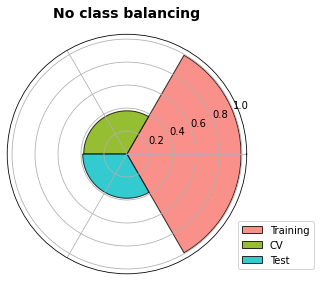

In [135]:
# No class balancing

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

data = df.iloc[0,:]

N = len(data)
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = data
width = 2 * np.pi / N

ax = plt.subplot(111, polar=True)

bars = ax.bar(theta, radii, width=width, bottom=0.0)
ax.xaxis.set_ticks(theta)

#ax.set_xticklabels(radii.index, fontsize=14)
ax.set_xticklabels(['','',''])
ax.tick_params(axis='x', which='major')

cmap = colors.ListedColormap(['#F8766D', '#7CAE00', '#00BFC4'])

for r, bar in zip(theta, bars):
    #bar.set_facecolor(plt.cm.hsv(r / np.pi / 2))
    bar.set_facecolor(cmap(r / np.pi / 2))
    bar.set_alpha(0.8)
    bar.set_edgecolor('black')

ax.legend(bars, radii.index, loc='lower right', bbox_to_anchor=(1.3, 0) )

ax.set_title('No class balancing', fontsize=14, fontweight='bold', pad=5) # Training set

plt.tight_layout()
plt.savefig('Figure_polarplot_MCC_df1.pdf')

In [136]:
# Custom function for making polar plot

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

def make_polar_plot(data, plotlabel):
  N = len(data)
  theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
  radii = data
  width = 2 * np.pi / N

  ax = plt.subplot(111, polar=True)

  bars = ax.bar(theta, radii, width=width, bottom=0.0)
  ax.xaxis.set_ticks(theta)

  #ax.set_xticklabels(radii.index, fontsize=14)
  ax.set_xticklabels(['','',''])
  ax.tick_params(axis='x', which='major')

  cmap = colors.ListedColormap(['#F8766D', '#7CAE00', '#00BFC4'])

  for r, bar in zip(theta, bars):
      #bar.set_facecolor(plt.cm.hsv(r / np.pi / 2))
      bar.set_facecolor(cmap(r / np.pi / 2))
      bar.set_alpha(0.7)
      bar.set_edgecolor('black')

  ax.legend(bars, radii.index, loc='lower right', bbox_to_anchor=(1.3, 0) )

  ax.set_title(plotlabel, fontsize=14, fontweight='bold', pad=5) # Training set

  txt = plotlabel.split()
  txt2 = [x.capitalize() for x in txt]
  txt3 = ''.join(txt2)

  plt.tight_layout()
  plt.savefig(f'Figure_polarplot_MCC_{txt3}.pdf')

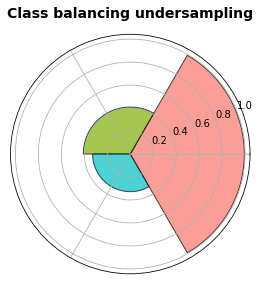

In [137]:
# Class balancing (undersampling)
data = df.iloc[1,:]

make_polar_plot(data, 'Class balancing undersampling')

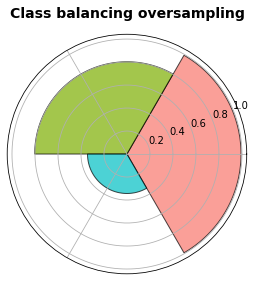

In [138]:
# Class balancing (oversampling)
data = df.iloc[2,:]

make_polar_plot(data, 'Class balancing oversampling')

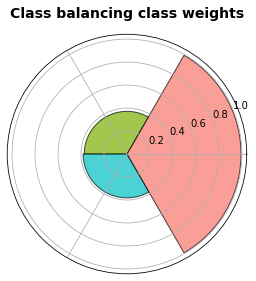

In [139]:
# Class balancing (class weights)
data = df.iloc[3,:]

make_polar_plot(data, 'Class balancing class weights')

## Concluding Remarks

In general, using more polarized data (negative vs. positive) generated better accuracy of learning algorithms for classification. In summary, for unbalanced data the best algorithm seems to be Logistic Regression, with an f1-score of 53% for negative sentiments, 86% for positive sentiments and 79% accuracy. As for the random sampling strategies, the algorithm with the highest classification power was the Support Vector Machine with an f1-score of 54% for negative feelings, 85% for positive feelings and 77% of accuracy. For MVV strategy, the results follow the previous experiment.

Although using more polarized data has improved the results, the estimates are still far from what was expected. Thus, it is concluded that more inputs (i.e, more tweets) are needed for classification solutions in CSA to be possible.